In [3]:
#!pip  install scikit-image 

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from skimage.io import imread 
from skimage.color import rgb2gray 

(-0.5, 63.5, 63.5, -0.5)

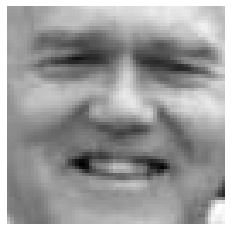

In [76]:
img1 = imread("../DATA/smile/smile/James_McPherson_0001.jpg")
plt.imshow(rgb2gray(img1),cmap="gray");
plt.axis("off")

(-0.5, 63.5, 63.5, -0.5)

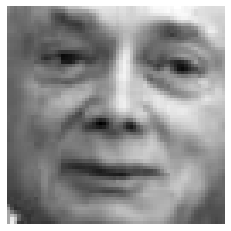

In [77]:
img2 = imread("../DATA/smile/non_smile/Franklin_Brown_0001.jpg")
plt.imshow(rgb2gray(img2),cmap="gray");
plt.axis("off")

In [6]:
sm_path = "../DATA/smile/smile/"
ns_path = "../DATA/smile/non_smile/"
sm_file_list = os.listdir(sm_path) 
ns_file_list = os.listdir(ns_path)

print ("There are {} smile and {} non-smile files ".format(len(sm_file_list),len(ns_file_list)))

There are 600 smile and 603 non-smile files 


In [10]:
img1.shape 

(64, 64, 3)

In [9]:
rgb2gray(img1).shape ## 3 ro hazf kard

(64, 64)

In [29]:
# loading smile :

X_sm = np.empty((len(sm_file_list),(64*64)))

for i in range(len(sm_file_list)) :
     img = rgb2gray(imread(os.path.join(sm_path,sm_file_list[i]))) 
     X_sm[i,:]= img.flatten()
     
y_sm = ["smile"]*len(sm_file_list)
# loading non-smile : 

X_ns = np.empty((len(ns_file_list),(64*64)))

for i in range(len(ns_file_list)) :
     img = rgb2gray(imread(os.path.join(ns_path,ns_file_list[i]))) 
     X_ns[i,:]= img.flatten()
     
y_ns = ["non-smile"]*len(ns_file_list)

In [ ]:
X_ns.shape , y_ns

((603, 4096),
 ['non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smile',
  'non-smil

In [35]:
X = np.concatenate([X_sm , X_ns])
y=np.asarray(y_sm+y_ns)

In [38]:
X.shape , y.shape 

((1203, 4096), (1203,))

smile


(-0.5, 63.5, 63.5, -0.5)

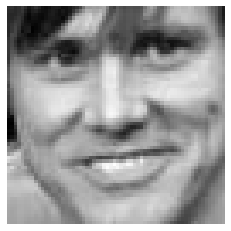

In [75]:
ind = np.random.randint(0,1203)
print(y[ind])
plt.imshow(np.reshape(X[ind,:],(64,64)),cmap="gray")
plt.axis("off")

In [78]:
from sklearn.model_selection import train_test_split 

In [80]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20)

In [81]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((962, 4096), (241, 4096), (962,), (241,))

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , classification_report 

In [98]:
steps1 = [("dimention reduction" ,PCA(n_components=0.95)) ,
          ("classifier",ABC(n_estimators=30))] 

steps2 = [("dimention reduction" ,PCA(n_components=0.95)) ,
          ("classifier",ABC(base_estimator=DTC(max_depth=5) , n_estimators=30 ))] 
          
steps3 = [("dimention reduction" ,PCA(n_components=0.95)) ,
          ("classifier",RFC(n_estimators=30))] 

steps4 = [("dimention reduction" ,PCA(n_components=0.95)) ,
          ("classifier",ABC(base_estimator=GaussianNB() , n_estimators=30 ))] 
          
clf1 = Pipeline(steps=steps1).fit(X_train,y_train)
clf2 = Pipeline(steps=steps2).fit(X_train,y_train)
clf3 = Pipeline(steps=steps3).fit(X_train,y_train)
clf4 = Pipeline(steps=steps4).fit(X_train,y_train)

In [99]:
print (classification_report(y_true =y_test , y_pred=clf1.predict(X_test )))

              precision    recall  f1-score   support

   non-smile       0.79      0.86      0.82       117
       smile       0.86      0.78      0.82       124

    accuracy                           0.82       241
   macro avg       0.82      0.82      0.82       241
weighted avg       0.82      0.82      0.82       241



In [100]:
print (classification_report(y_true =y_test , y_pred=clf2.predict(X_test )))


              precision    recall  f1-score   support

   non-smile       0.77      0.81      0.79       117
       smile       0.81      0.77      0.79       124

    accuracy                           0.79       241
   macro avg       0.79      0.79      0.79       241
weighted avg       0.79      0.79      0.79       241



In [101]:
print (classification_report(y_true =y_test , y_pred=clf3.predict(X_test )))


              precision    recall  f1-score   support

   non-smile       0.80      0.87      0.83       117
       smile       0.87      0.79      0.83       124

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



In [102]:
print (classification_report(y_true =y_test , y_pred=clf4.predict(X_test)))

              precision    recall  f1-score   support

   non-smile       0.88      0.18      0.30       117
       smile       0.56      0.98      0.71       124

    accuracy                           0.59       241
   macro avg       0.72      0.58      0.50       241
weighted avg       0.71      0.59      0.51       241



In [103]:
from sklearn.model_selection import KFold 

In [108]:
kf = KFold(n_splits=5)
abc_acc=[]
rfc_acc = []
k=1

for train_index , test_index in kf.split(X): 
     X_train , X_test = X[train_index] , X[test_index]
     y_train , y_test = y[train_index] , y[test_index]
      
     steps1 = [("dimention reduction" , PCA(n_components=.95 )),
               ("classifier" , ABC(n_estimators=30 ))
               ]
     steps3 = [("dimention reduction" ,PCA(n_components=0.95)) ,
          ("classifier",RFC(n_estimators=30))] 

     abc= Pipeline(steps=steps1).fit(X_train,y_train)
     rfc= Pipeline(steps=steps3).fit(X_train,y_train)

     abc_acc.append(accuracy_score(y_true=y_test,y_pred=abc.predict(X_test)))
     rfc_acc.append(accuracy_score(y_true=y_test,y_pred=rfc.predict(X_test)))
     print(k)
     k+=1


1
2
3
4
5


In [109]:
np.mean(abc_acc) , np.mean(rfc_acc) 

(0.7838969571230983, 0.6833540802213001)

In [113]:
np.std(abc_acc)*100 , np.std(rfc_acc)* 100  

(4.5674430270513415, 9.522295318990974)

In [114]:
abc_acc , rfc_acc 

([0.7344398340248963,
  0.7634854771784232,
  0.8257261410788381,
  0.7458333333333333,
  0.85],
 [0.6058091286307054,
  0.5518672199170125,
  0.8174273858921162,
  0.6958333333333333,
  0.7458333333333333])